# AST 376R - Introduction to Python Part 6

## Original Notebook written by Jackie Champagne
## Rewritten and Adapted for AST 376R by Jonathan Florez

# Astropy, FITS files & Imaging

Congrats on making it to the last part of this tutorial!

A package we highly recommend you become familiar with is astropy. This includes a library of astronomical constants and unit conversions, coordinate conversions, cosmological calculations, image processing, and much more!

## Pip install

This leads us to a great opportunity to show you how to install additional packages to your Python distribution. If it is a large, well-known package (i.e., not developed by one person on github), you can usually install things using pip. Go ahead and open a terminal session. Once you are in bash and your Python environment, type

    pip install astropy
    
This will automatically download and install astropy from the Internet! Note that this needs to be done outside of a Jupyter notebook (it'll throw an error if you try it). 

(Depending on the distribution of Python you have installed on your computer, it may or may not have come with astropy preloaded. If it's already there, then pip install will stop and say 'requirement already satisfied.')


## Astropy: Units & Constants

The most basic use for Astropy is units and constants. I highly recommend using the constants within Astropy so that a) you're not constantly Googling them, and b) they are precise and accurate. The constants are loaded with units as well, making conversions between them quite easy.

One quick disclaimer is that the solar mass constant is slightly out of date, so researchers doing high-precision stellar work may need to keep that in mind.

Load up the constants as well as our other usual packages:


In [1]:
from astropy import constants as const
import numpy as np
import matplotlib.pyplot as plt

To call a constant, simply type const.(constant) where the symbols are generally the same as what's in your textbooks. For example, G is Newton's gravitational constant:

In [2]:
G = const.G

print(G)
const.G

  Name   = Gravitational constant
  Value  = 6.6743e-11
  Uncertainty  = 1.5e-15
  Unit  = m3 / (kg s2)
  Reference = CODATA 2018


<<class 'astropy.constants.codata2018.CODATA2018'> name='Gravitational constant' value=6.6743e-11 uncertainty=1.5e-15 unit='m3 / (kg s2)' reference='CODATA 2018'>

Calling the constant will give you a bunch of information about it, including its name, value, uncertainty, and SI unit. Astropy is not in cgs units, but it's easy to convert by adding .cgs to the end of the unit:

In [3]:
G_cgs = const.G.cgs

print(G_cgs)

6.674299999999999e-08 cm3 / (g s2)


You can also convert to specific units as you choose, by doing .to('new units'). For example:

In [4]:
G_weirdunits = const.G.to('kpc3 / (Msun Gyr2)')

print(G_weirdunits)

4.498502151469554e-06 kpc3 / (Gyr2 solMass)


This can be very helpful when using normalized equations. Note that Python will have trouble with certain units: for example, it doesn't know it can cancel out Hz and seconds. Also, if there are units inside a log expression, it will complain. So if you already know your units work out and you just want the value, you can type .value!

These can also be combined, like G.cgs.value.

In [5]:
G_value = const.G.value

print(G_value)

6.6743e-11


If you do want to keep track of units, you can assign them by multiplying a float by the unit.

In [6]:
from astropy import units as u

R = 1.0 * u.kpc

print(R)

1.0 kpc


### Question 1: Using astropy, call the speed of light. Define a new speed of light variable by converting it to kilometers per Megayear. 

In [7]:
# solution here
c = const.c

c_weirdunits = const.c.to('km / Myr')

print(c_weirdunits)

9.4607304725808e+18 km / Myr


A list of all Astropy constants can be found at: https://docs.astropy.org/en/stable/constants/

## Astropy: Cosmological Calculations

There's a good chance you will need to calculate things like luminosity distance, angular diameter distance, or age of the Universe, especially if you are doing high-redshift work. To do cosmology in astropy, first set the cosmological parameters, like so:

In [8]:
from astropy.cosmology import FlatLambdaCDM

cosmo=FlatLambdaCDM(H0=70., Om0=0.3)

This sets the Hubble constant to 70 km/s / Mpc and the matter density factor, $\Omega_M$, to 0.3. The cosmological calculations are attributes of FlatLambdaCDM which we've set to "cosmo." Here are a couple of examples:

In [10]:
LD4 = cosmo.luminosity_distance(4).to('kpc').value
ADD4 = cosmo.angular_diameter_distance(4)

print("Luminosity Distance at z=4:", LD4, "Angular Diameter Distance at z=4:", ADD4)

Luminosity Distance at z=4: 35851832.07231645 Angular Diameter Distance at z=4: 1434.073282892658 Mpc


### Question 2: What is the age of the Universe at redshift 1, in Myr and Gyr?
(Hint: use cosmo.age)

In [11]:
# solution here
age_Myr = cosmo.age(1).to('Myr')
age_Gyr = cosmo.age(1).to('Gyr')

print("Age at z=1 in Myr:", age_Myr)
print("Age at z=1 in Gyr:", age_Gyr)

Age at z=1 in Myr: 5751.646943448283 Myr
Age at z=1 in Gyr: 5.751646943448283 Gyr


## FITS Files

Astropy can read in FITS files, FITS stands for Flexible Image Transport System. FITS files are commonly used to store large tables of data, of many different variable types, and it is also a commonly used format for astronomical images. 

For both astronomical images and data tables, FITS is a useful format because it provides a lot of behind the scenes information. For images, the header in particular will usually give you information about the telescope the data is from, the reference position in the sky for the data, the pixel scale, the size of the image, and more. For large tables of data, the header can provide the column names, variable types, and in some instances the astronomical units that are used for different variables. In this tutorial, we will use astropy to read a large table of data in FITS format and we will use Aplpy to display a FITS image.

In [12]:
from astropy.io import fits

Let's step through how to work with the files I've given you to work with. First, open the file using fits.open(). To get some basic information about the file, type fitsfile.info().

In [13]:
hdu = fits.open('S1_AGN_cat.fits') # Catalog of luminous quasars
hdu.info()

Filename: S1_AGN_cat.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       4   ()      
  1                1 BinTableHDU     52   938R x 22C   [K, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D]   


The header for this file gives you some relevant information. We can see the format of all variables (K is integer, D is float), and we can see under Dimensions that this table has 938 rows, and 22 columns. In the cases of images, the header will contain far more relevant information about the image.

For data tables, it is more useful to see the columns first:

In [14]:
hdu[1].columns

ColDefs(
    name = 'id'; format = 'K'
    name = 'RA'; format = 'D'
    name = 'DEC'; format = 'D'
    name = 'redshift'; format = 'D'
    name = 'Mstar'; format = 'D'
    name = 'logLx'; format = 'D'
    name = 'DECam_u'; format = 'D'
    name = 'DECam_u_err'; format = 'D'
    name = 'DECam_g'; format = 'D'
    name = 'DECam_g_err'; format = 'D'
    name = 'DECam_r'; format = 'D'
    name = 'DECam_r_err'; format = 'D'
    name = 'DECam_i'; format = 'D'
    name = 'DECam_i_err'; format = 'D'
    name = 'DECam_z'; format = 'D'
    name = 'DECam_z_err'; format = 'D'
    name = 'Ks'; format = 'D'
    name = 'Ks_err'; format = 'D'
    name = 'IRAC1'; format = 'D'
    name = 'IRAC1_err'; format = 'D'
    name = 'IRAC2'; format = 'D'
    name = 'IRAC2_err'; format = 'D'
)

Notice that we use hdu[1] before calling columns. This is becuase the first element of hdu contains some stored information that is not necessarily relevant to us. The second element of hdu contains the data table, which is why we view columns and table data calling hdu[1].

We can call variables using hdu[1].data:

In [15]:
tb = hdu[1].data

Mstar = tb['Mstar']
print(Mstar)

[1.03770765e+11 9.66225706e+10 9.73376070e+10 9.18548863e+10
 7.57366987e+10 6.27516217e+10 1.00807315e+11 6.03273086e+10
 6.82957361e+10 2.86065872e+10 7.93106046e+10 5.56723158e+10
 1.32288931e+11 7.00163398e+10 3.11668882e+10 6.64051099e+10
 1.84698473e+10 1.59848003e+11 3.30722179e+10 5.74409127e+10
 1.04653030e+11 3.49243090e+10 5.41399459e+10 8.06025510e+10
 5.30923882e+10 1.73951361e+10 1.16605868e+11 3.86741667e+10
 2.78356109e+10 3.07319672e+10 1.79098494e+11 3.06382062e+11
 9.20181768e+10 2.92852814e+10 7.93456363e+10 6.86850533e+10
 6.40761766e+09 4.11378484e+10 1.31623458e+10 4.24221582e+10
 2.84100350e+10 4.00582683e+10 2.12512117e+11 9.38802069e+10
 1.63441025e+10 3.02428722e+10 4.79120122e+10 3.15877643e+10
 1.67348774e+11 2.10958788e+11 6.78769111e+10 2.47681196e+11
 5.06288039e+10 5.79680826e+10 6.05297462e+10 1.60635305e+11
 3.43502680e+10 1.39324595e+10 6.41651960e+10 1.14858953e+11
 8.62408112e+10 2.19330517e+10 9.35349728e+10 2.95319892e+11
 9.75577916e+09 5.162697

### Question 3: Read in the logLx variable from this FITS table. What is its max, min, and median value?

In [16]:
# solution here
logLx = tb['logLx']
print("max logLx:", np.max(logLx), "min logLx:", np.min(logLx), "median logLx:", np.median(logLx))

max logLx: 46.049725339410465 min logLx: 43.013844441701174 median logLx: 44.446508761192845


## Aplpy

My favorite way to work with images in Python is the package aplpy (pronounced Apple Pie) which allows you to make lovely publication-worthy image plots. 

#### Pip install aplpy, and import it here.

In [17]:
import aplpy

To use aplpy, you don't need to go through the process of opening the FITS file and grabbing the data as in astropy. You will just open the file using FITSFigure. Let's check out this mysterious image:

 [astropy.io.fits.verify]
this form of the PCi_ja keyword is deprecated, use PCi_ja. [astropy.wcs.wcs]
this form of the PCi_ja keyword is deprecated, use PCi_ja. [astropy.wcs.wcs]
this form of the PCi_ja keyword is deprecated, use PCi_ja. [astropy.wcs.wcs]
this form of the PCi_ja keyword is deprecated, use PCi_ja. [astropy.wcs.wcs]
Changed DATE-OBS from '1987/09/20        ' to '1987-09-20T00:00:00.0''. [astropy.wcs.wcs]


INFO: Auto-setting vmin to  1.627e+03 [aplpy.core]
INFO: Auto-setting vmax to  3.193e+04 [aplpy.core]


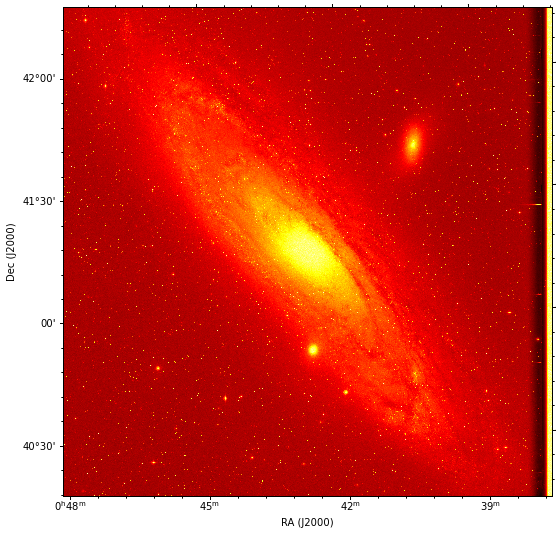

In [18]:
galaxy = aplpy.FITSFigure('f001a066.fits')
galaxy.show_colorscale(cmap='hot')

plt.show()

This is the tutorial included in the Aplpy documentation that nicely shows how you can overplot contours and include multiple layers. Take some time to play with this:

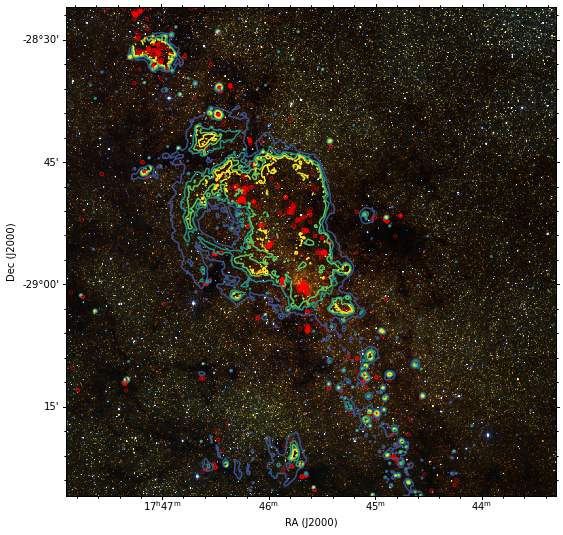

In [24]:
galaxy = aplpy.FITSFigure('aplpy_tutorial/fits/2MASS_k.fits')

galaxy.show_rgb('aplpy_tutorial/graphics/2MASS_arcsinh_color.png')

galaxy.show_contour('aplpy_tutorial/fits/mips_24micron.fits')

data = np.loadtxt('aplpy_tutorial/data/yso_wcs_only.txt')
ra, dec = data[:, 0], data[:, 1]

galaxy.show_markers(ra, dec, layer='marker_set_1', edgecolor='red', facecolor='none', 
                    marker='o', s=10, alpha=0.5)

plt.show()